In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma
import patsy

# 30, October 2019

In [2]:
def ll_normal(beta, yX):
    y = yX[:, 0]
    X = yX[:, 1:]
    N = X.shape[0]
    mu = np.full(N, np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n, :] * beta)
        
    d = y - mu
    return np.sum(d*d)

def optim(data, initval = None):
    return minimize(ll_normal, (initval if initval else np.random.normal()), args=(data), method="BFGS")["x"]

def bootstrap(data, R, fun, confidence=87):
    N = data.size
    thetas = np.full(R, np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace=True)
        thetas[r] = fun(data[idx])
    cmin = (100-confidence)/2
    cmax = cmin + confidence
    return np.percentile(thetas, [cmin, cmax])

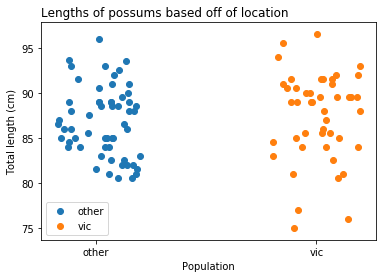

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/possum.csv")
for i, (name, gdf) in enumerate(df.groupby('pop')):
    bp.jitter(np.repeat(i, gdf['totalL'].size), gdf['totalL'], jitter_y=0, label=name, color = bp.color[i])

bp.xticks([0,1], np.unique(df['pop']))
bp.title("Lengths of possums based off of location")
bp.labels(x="Population", y="Total length (cm)")
bp.legend()

### Categorical Variables
Categorical variables have **levels** which correspond to the groups within a catagorical variable. For our instance, "other" and "vic" are both levels, meaning this dataset has two levels for the categorical variable "pop"

### Generally
$Y_n$ is unique for each observation and $Y_n \sim N(\mu_n, \sigma^2)$ Where $_n$ denotes each observation and  
$\mu_n=\beta_0+\beta_1 * X_n$

### Specifically (To this data set)
$$\text{TotalL}_n\sim N(\mu_n, \sigma^2)$$
$$\mu_n=\beta_0+\beta_1*\text{vic}_n$$
Basically stating that if a possom came from vic, $\text{vic}_n$ is 1, otherwise, it is 0

## Simplified Log-likelihood for nomarl RV's
$$\sum(y_n-\mu)^2$$
We have replaced $\mu$ so we now have
$$\sum(y_n-(\beta_0+\beta_1*x_n))^2$$

In [17]:
X = patsy.dmatrix(" ~C(pop)", data=df)
yX = np.c_[df["totalL"], X]
yX[-5:, :]

array([[81.5,  1. ,  0. ],
       [82.5,  1. ,  0. ],
       [89. ,  1. ,  0. ],
       [82.5,  1. ,  0. ],
       [89. ,  1. ,  0. ]])